# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)*1/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(U)

# Calculate the coordinates in new orthonormal basis:


# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


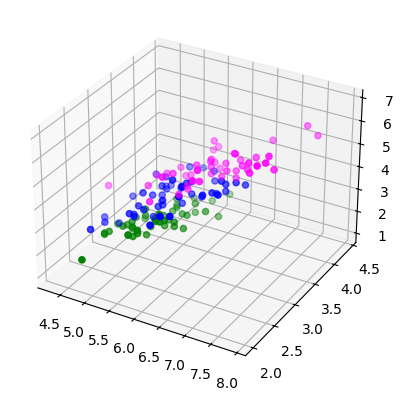

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show()


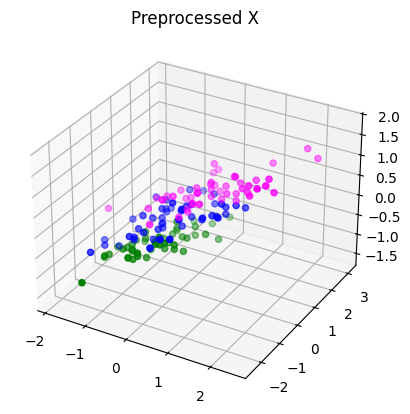

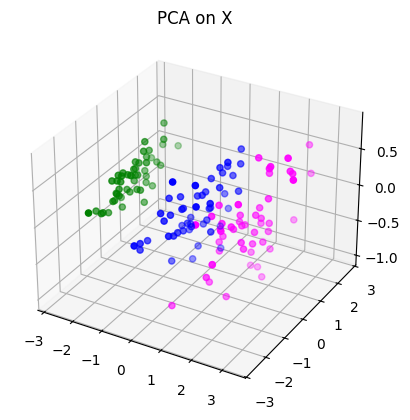

Covariance matrix of PCA
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [4]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)


axes2=plt.axes(projection='3d')
plt.title("Preprocessed X")
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show()


# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
#print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
axes3=plt.axes(projection='3d')
plt.title("PCA on X")
axes3.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes3.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes3.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()

print("Covariance matrix of PCA")
print(pca.get_covariance())


In [5]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [6]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

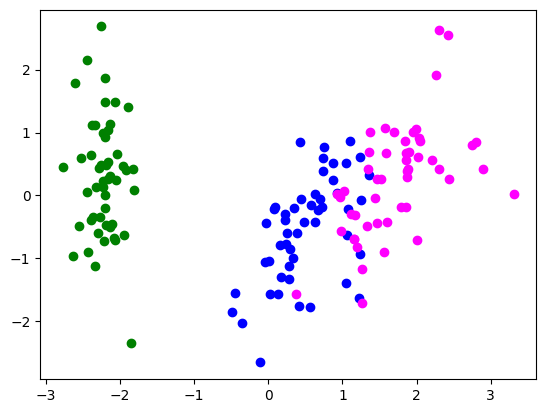

In [7]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0], Xpca[y==0,1], color='green')
plt.scatter(Xpca[y==1,0], Xpca[y==1,1], color='blue')
plt.scatter(Xpca[y==2,0], Xpca[y==2,1], color='magenta')

# KNN classifier

In [8]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Confusion Matrix for Xpp")
print(confusion_matrix(y_test, Ypred))
#ConfusionMatrixDisplay.from_predictions(y_test, Ypred)



Confusion Matrix for Xpp
[[18  0  0]
 [ 0 11  1]
 [ 0  2 13]]


In [9]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
X_train, X_test, y_train, y_test = train_test_split(Xpca,y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

print("Confusion Matrix for Xpca")
print(confusion_matrix(y_test, Ypred))
#ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

Confusion Matrix for Xpca
[[12  1  0]
 [ 0 16  1]
 [ 0  1 14]]


In [10]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
Xpca_reduced = Xpca[:,[0,1]]
#print(Xpca)
#print(Xpca_reduced)

X_train, X_test, y_train, y_test = train_test_split(Xpca_reduced,y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

print("Confusion Matrix for Xpca(0, 1)")
print(confusion_matrix(y_test, Ypred))
#ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

Confusion Matrix for Xpca(0, 1)
[[12  1  0]
 [ 0 14  1]
 [ 0  2 15]]


In [12]:
# Classes 1 and 2
Xpca_reduced = Xpca[:,[1,2]]
#print(Xpca)
#print(Xpca_reduced)

X_train, X_test, y_train, y_test = train_test_split(Xpca_reduced,y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

print("Confusion Matrix for Xpca(1, 2)")
print(confusion_matrix(y_test, Ypred))
#ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

Confusion Matrix for Xpca(1, 2)
[[9 3 1]
 [7 8 3]
 [9 3 2]]


In [16]:
# Classes 0 and 2
Xpca_reduced = Xpca[:,[0,2]]
#print(Xpca)
#print(Xpca_reduced)

X_train, X_test, y_train, y_test = train_test_split(Xpca_reduced,y,test_size=0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

print("Confusion Matrix for Xpca(0, 2)")
print(confusion_matrix(y_test, Ypred))
#ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

Confusion Matrix for Xpca(0, 2)
[[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
